In [68]:
import numpy as np
import pandas as pd
import os

In [69]:
data = pd.read_csv('sampleSubmission.csv')
data

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


### Read Dataset File

In [70]:
train_dt=pd.read_csv('train_dt.tsv',sep='\t')

### Exploratory Data

In [71]:
train_dt

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [72]:
train_dt.head()   # extract first 5 records

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


<AxesSubplot:>

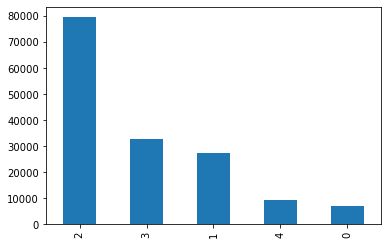

In [73]:
train_dt['Sentiment'].value_counts().plot(kind='bar')

The sentiment labels are:

0-negative
1-somewhat negative
2-neutral
3-somewhat positive
4-positive

In [74]:
train_dt.Sentiment.min(),train_dt.Sentiment.max()

(0, 4)

In [76]:
train_dt.Sentiment[3]

2

#### Remove duplicate rows

In [77]:
train_dt.drop_duplicates(subset=["SentenceId"], keep = 'first')

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
63,64,2,"This quiet , introspective and entertaining in...",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
116,117,4,A positively thrilling combination of ethnogra...,3
156,157,5,Aggressive self-glorification and a manipulati...,1
...,...,...,...,...
155984,155985,8540,... either you 're willing to go with this cla...,2
155997,155998,8541,"Despite these annoyances , the capable Claybur...",2
156021,156022,8542,-LRB- Tries -RRB- to parody a genre that 's al...,1
156031,156032,8543,The movie 's downfall is to substitute plot fo...,1


In [84]:
train_df = train_dt.drop_duplicates(subset=["SentenceId"], keep = 'first',inplace=True) # save as with new name

In [105]:
train_df

<AxesSubplot:>

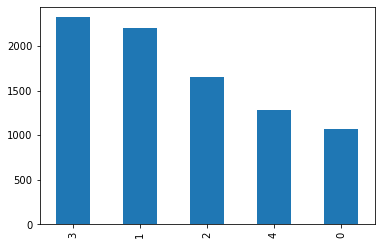

In [107]:
train_dt['Sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:>

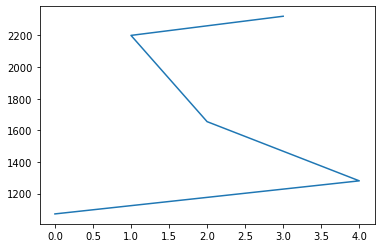

In [108]:
train_dt['Sentiment'].value_counts().plot(kind='line')

In [109]:
seq_len = 512
num_samples = len(train_dt)
num_samples

8529

In [110]:
!pip install transformers

In [111]:
from transformers import BertTokenizer

### Use Bert tokenizer

In [112]:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

In [113]:
tokens = tokenizer(train_dt["Phrase"].tolist(),
                  max_length=seq_len,
                  truncation=True,
                  padding="max_length",
                  add_special_tokens=True, # the sequences will be encoded with the special tokens relative to their model
                  return_tensors="np")

In [114]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [115]:
tokens["input_ids"],tokens["attention_mask"]

(array([[ 101,  138, 1326, ...,    0,    0,    0],
        [ 101, 1188, 3589, ...,    0,    0,    0],
        [ 101, 2431, 3899, ...,    0,    0,    0],
        ...,
        [ 101,  118,  149, ...,    0,    0,    0],
        [ 101, 1109, 2523, ...,    0,    0,    0],
        [ 101, 1109, 1273, ...,    0,    0,    0]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]))

In [116]:
classes_arr = train_dt["Sentiment"].values
classes_arr

array([1, 4, 1, ..., 1, 1, 2], dtype=int64)

In [117]:
labels = np.zeros((num_samples, classes_arr.max()+1))
labels.shape

(8529, 5)

### make one hot labels

In [118]:
labels[np.arange(num_samples), classes_arr] = 1
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])